<a href="https://colab.research.google.com/github/mburkey3/Intro_to_ML/blob/main/MB_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [253]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [254]:
file_path = '/content/drive/My Drive/Intro_to_ML/Datasets/D3.csv'

df = pd.DataFrame(pd.read_csv(file_path))
df.head()

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [255]:
# Seperating each column
x1 = df.values[:, 0]
x2 = df.values[:, 1]
x3 = df.values[:, 2]
y = df.values[:, 3]
m = len(y) # number of samples

# Display each variable
print('x1 = ', x1[: 3])
print('x2 = ', x2[: 3])
print('x3 = ', x3[: 3])
print('y = ', y[: 3])
print('m = ', m)

x1 =  [0.         0.04040404 0.08080808]
x2 =  [3.44       0.1349495  0.82989899]
x3 =  [0.44       0.88848485 1.3369697 ]
y =  [4.38754501 2.6796499  2.96848981]
m =  100


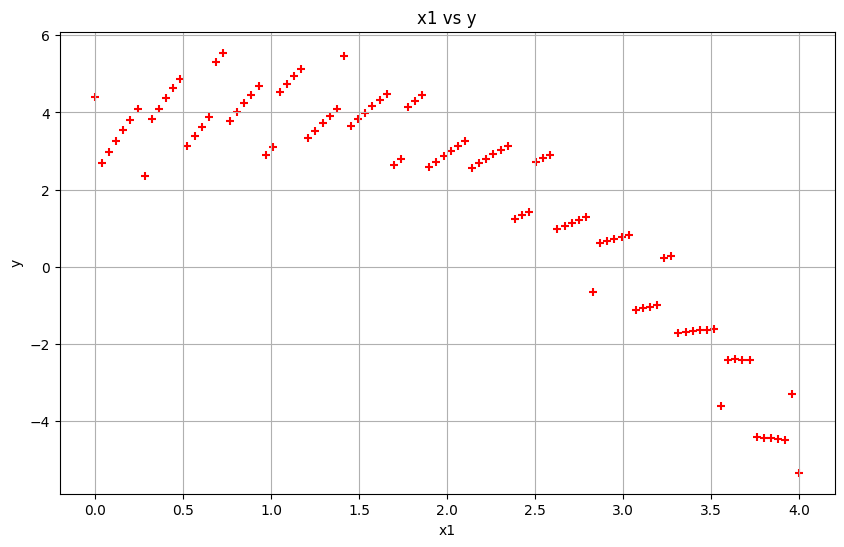

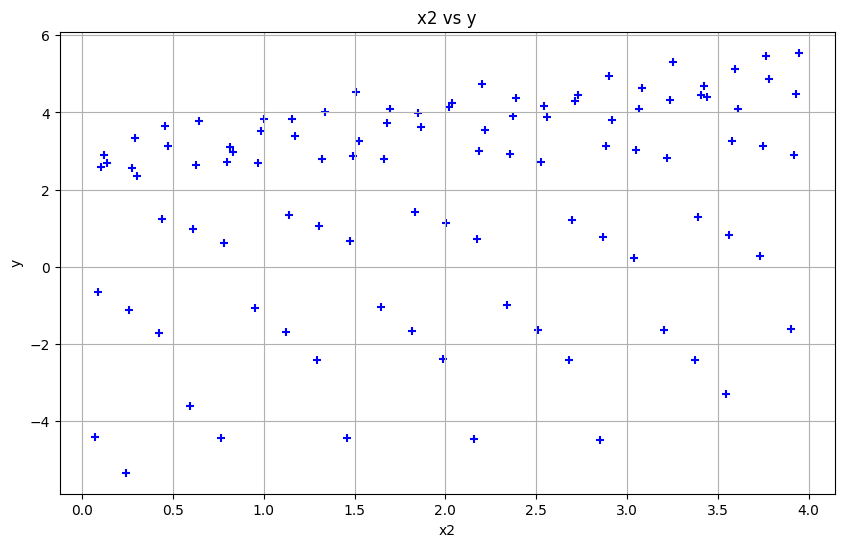

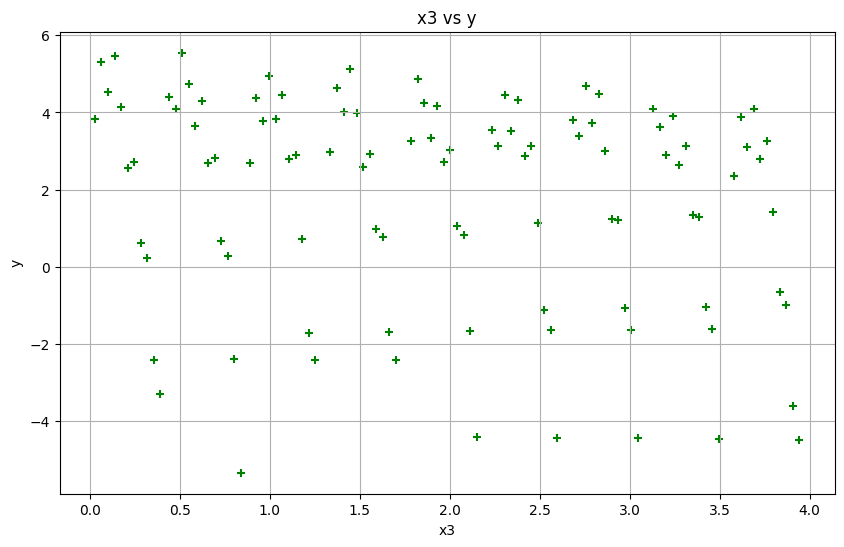

In [256]:
# Plotting each explanatory varaible vs y
# x1 vs y plot and parameters
plt.scatter(x1, y, color='red', marker='+')
plt.grid(True)
plt.rcParams["figure.figsize"] = (10, 6)
plt.xlabel('x1')
plt.ylabel('y')
plt.title('x1 vs y')
plt.show()

# x2 vs y plot and parameters
plt.scatter(x2, y, color='blue', marker='+')
plt.grid(True)
plt.rcParams["figure.figsize"] = (10, 6)
plt.xlabel('x2')
plt.ylabel('y')
plt.title('x2 vs y')
plt.show()

# x3 vs y plot and parameters
plt.scatter(x3, y, color='green', marker='+')
plt.grid(True)
plt.rcParams["figure.figsize"] = (10, 6)
plt.xlabel('x3')
plt.ylabel('y')
plt.title('x3 vs y')
plt.show()

In [257]:
# Creating x1 linear regression
x1_0 = np.ones((m, 1)) # Bias term
x1_1 = x1.reshape(m, 1)

x1 = np.hstack((x1_0, x1_1))
x1[:5]

array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [258]:
theta = np.zeros(2)
theta

array([0., 0.])

In [259]:
def compute_cost(x, y, theta) :
    """
    Compute cost for linear regression.

    Parameters:
    x : 2D array where each row represents the training example and each column
      m = number of training examples
      n = number of features (inlcuding x_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta: 1D array of fitting parameters or weights. Demension(n)

    Returns:
    J : Scalar value, cost
    """
    predictions = x.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [260]:
# Compute cost for theta values
cost = compute_cost(x1, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [261]:
def gradient_descent(x, y, theta, alpha, iterations) :
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    x : 2D array where each row represents the training example and each column
      m = number of training examples
      n = number of features (inlcuding x_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Demension(n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations.
    cost_history : Array containing the cost for each iteration. Dimension(iterations)
    """
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = x.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * x.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(x, y, theta)

    return theta, cost_history

In [262]:
# Intial Parameters for x1
theta = [0., 0.]
iterations = 1500
alpha = 0.05

In [263]:
# Optimizing parameters
theta, cost_history = gradient_descent(x1, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [ 5.9279486  -2.03833651]
cost_history = [5.32852962 5.18676104 5.07204859 ... 0.98499308 0.98499308 0.98499308]


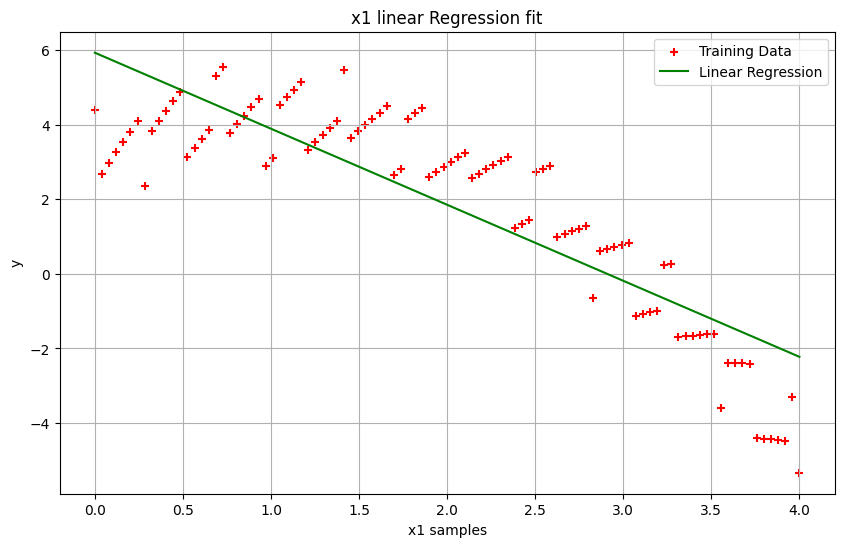

In [264]:
## Plotting x1 linear regression
# Scatter plot of training data
plt.scatter(x1[:, 1], y, color='red', marker='+', label='Training Data')

# Linear regression plot
plt.plot(x1[:, 1], x1.dot(theta), color='green', label='Linear Regression')

# Extra plot parameters
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('x1 samples')
plt.ylabel('y')
plt.title('x1 linear Regression fit')
plt.legend()

# Show plot
plt.show()

In [265]:
## NOW FOR x2
x2_0 = np.ones([m, 1])
x2_1 = x2.reshape(m, 1)

x2 = np.hstack((x2_0, x2_1))
x2[:5]

array([[1.        , 3.44      ],
       [1.        , 0.1349495 ],
       [1.        , 0.82989899],
       [1.        , 1.52484848],
       [1.        , 2.21979798]])

In [266]:
# Initial parameters for x2
theta = [0., 0.]
iterations = 1500
alpha = 0.05

In [267]:
# Optimizing parameters for x2
theta, cost_history2 = gradient_descent(x2, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history2)

Final value of theta = [0.73606041 0.55760762]
cost_history = [4.5369622  4.06234927 3.83409365 ... 3.59936602 3.59936602 3.59936602]


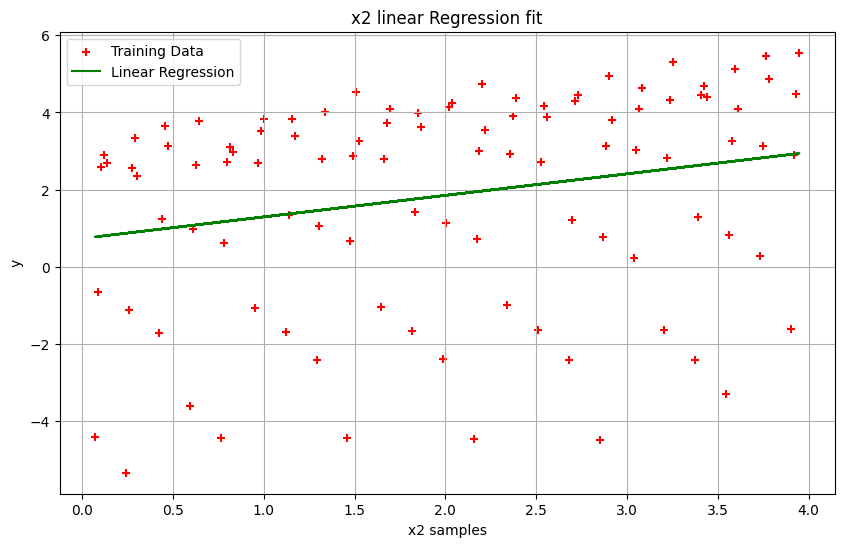

In [268]:
## Plotting x2 linear regression
# Scatter plot of training data
plt.scatter(x2[:, 1], y, color='red', marker='+', label='Training Data')

# Linear regression plot
plt.plot(x2[:, 1], x2.dot(theta), color='green', label='Linear Regression')

# Extra plot parameters
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('x2 samples')
plt.ylabel('y')
plt.title('x2 linear Regression fit')
plt.legend()

# Show plot
plt.show()

In [269]:
## NOW FOR x3
x3_0 = np.ones([m, 1])
x3_1 = x3.reshape(m, 1)

x3 = np.hstack((x3_0, x3_1))
x3[:5]

array([[1.        , 0.44      ],
       [1.        , 0.88848485],
       [1.        , 1.3369697 ],
       [1.        , 1.78545454],
       [1.        , 2.23393939]])

In [270]:
# intial parameters
theta = [0., 0.]
iterations = 1500
alpha = 0.05

In [271]:
# Optimizing parameters
theta, cost_history3 = gradient_descent(x3, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history3)

Final value of theta = [ 2.87142199 -0.52048284]
cost_history = [5.00990921 4.74622414 4.60645259 ... 3.62945112 3.62945112 3.62945112]


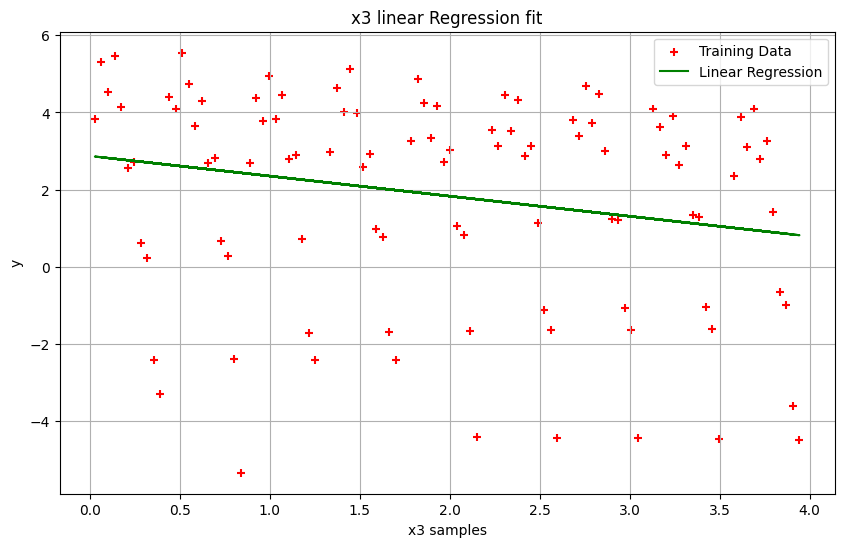

In [272]:
## Plotting x3 linear regression
# Scatter plot of training data
plt.scatter(x3[:, 1], y, color='red', marker='+', label='Training Data')

# Linear regression plot
plt.plot(x3[:, 1], x3.dot(theta), color='green', label='Linear Regression')

# Extra plot parameters
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('x3 samples')
plt.ylabel('y')
plt.title('x3 linear Regression fit')
plt.legend()

# Show plot
plt.show()